In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import  integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore'
                        , category=integrate.IntegrationWarning)

In [3]:
# 정의된 x의 범위를 나타내는 numpy 배열입니다.
# 이 범위는 f(x)가 0이 아닌 값을 가지는 구간입니다.
x_range = np.array([0, 1])

# 함수 f를 정의합니다. 이 함수는 x를 인자로 받습니다.
def f(x):
    
    # x가 x_range에 정의된 구간 내에 있을 때만 계산을 수행합니다.
    if x_range[0] <= x <= x_range[1]:
        
        # x가 구간 [0, 1] 내에 있을 때, 함수의 값은 2x입니다.
        # 이는 f(x)가 해당 구간에서 선형 증가하는 확률 밀도 함수임을 의미합니다.
        return 2 * x
        
    else:
        
        # x가 지정된 범위를 벗어나면 함수의 값은 0입니다.
        # 즉, 확률 밀도가 해당 구간 밖에서는 0이 되어 확률이 없음을 의미합니다.
        return 0

In [4]:
# X 라는 변수를 생성합니다. 이는 리스트 데이터 구조입니다.
X = [
    x_range,  # x_range: 이것은 확률 변수 X가 취할 수 있는 값의 범위를 나타내는 배열입니다.
    f         # f: 이것은 x_range 내의 각 x 값에 대해 확률 밀도 함수(PDF)의 값을 계산하는 함수입니다.
              # f(x)는 특정 x 값에 대한 확률 밀도를 반환합니다.
]

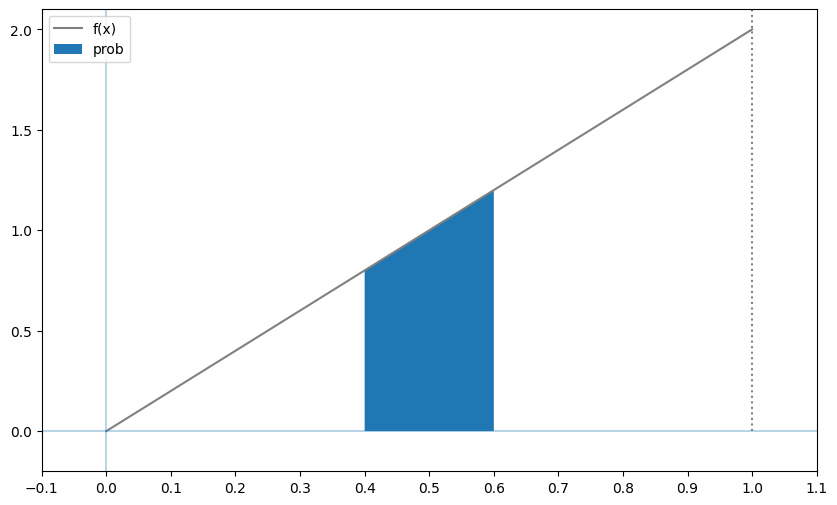

In [5]:
# np.linspace를 사용하여 x_range의 최소값에서 최대값 사이에 균일한 간격으로 100개의 값을 생성합니다.
xs = np.linspace(x_range[0], x_range[1], 100)

# 그래프의 크기를 설정합니다 (가로 10인치, 세로 6인치).
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# xs 배열에 대해 f 함수를 계산하고 결과를 그래프로 그립니다.
# 여기서 f(x)는 앞서 정의한 조건부 함수입니다.
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')

# x축과 y축에 대한 보조선을 추가합니다. 투명도는 alpha 파라미터로 조절합니다.
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)

# xs 배열의 최대값에 대한 수직 점선을 추가합니다.
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6까지 x의 범위에 대해 xs 배열을 다시 생성합니다.
xs = np.linspace(0.4, 0.6, 100)
# xs 범위에 해당하는 f(x) 아래 영역을 채웁니다.
# 이는 0.4에서 0.6까지 x 값에 대한 확률을 시각적으로 나타냅니다.
ax.fill_between(xs, [f(x) for x in xs], label='prob')

# x축의 눈금을 설정합니다. -0.2부터 1.3까지 0.1 간격으로 표시합니다.
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
# x축과 y축의 범위를 각각 설정합니다.
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
# 범례를 표시합니다.
ax.legend()

# 그래프를 표시합니다.
plt.show()

In [6]:
# integrate.quad 함수는 수치적분을 수행합니다.
# 첫 번째 인자 'f'는 수치적분할 함수를 의미합니다.
# 두 번째와 세 번째 인자는 적분할 구간의 하한과 상한을 의미합니다.

# 이 코드는 f 함수를 0.4에서 0.6까지 적분하여 그 결과를 반환합니다.
# 이것은 통계적 맥락에서 확률 변수 X가 0.4와 0.6 사이의 값을 가질 확률을 구하는 것과 같습니다.
# 결과값은 적분 값과 추정 오차의 두 가지를 포함하는 튜플입니다.
# 첫 번째 요소는 적분의 추정값이고, 두 번째 요소는 절대 오차의 추정치입니다.

result, error = integrate.quad(f, 0.4, 0.6)
# 'result'는 계산된 적분의 값으로, 0.4에서 0.6까지 구간에 대한 f의 총 면적을 나타냅니다.
# 'error'는 수치 적분 과정에서 발생하는 추정 오차의 한계를 나타냅니다.

In [7]:
# minimize_scalar 함수를 scipy.optimize로부터 임포트합니다.
from scipy.optimize import minimize_scalar

# minimize_scalar 함수를 사용하여 함수 f의 최소값을 찾습니다.
# 함수 f는 이전에 정의되었을 것으로 가정하고, 이 함수는 하나의 스칼라 값을 인자로 받습니다.
# minimize_scalar는 해당 함수의 최소값을 찾기 위해 실행됩니다.
res = minimize_scalar(f)

# 최적화 결과는 'res'에 저장되며, 이 객체는 최적화 과정에 대한 다양한 정보를 포함합니다.
# res.fun은 최적화를 통해 찾은 함수 f의 최소값입니다.
# 이 값은 함수 f가 최소화되는 입력값 x에 대한 함수값 f(x)입니다.
res.fun

0

In [8]:
# integrate.quad는 수치적분 함수로, 주어진 함수 f를 -무한대에서 무한대까지 적분합니다.
# f는 이전에 정의한 함수이며, 이 함수는 일반적으로 확률 밀도 함수(PDF)로 사용됩니다.
# np.inf는 무한대를 나타내는 NumPy 객체입니다.

# 결과는 적분값과 추정된 오차를 포함하는 튜플입니다.
# 여기서 [0]은 결과 튜플의 첫 번째 요소, 즉 적분값을 가져옵니다.
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [9]:
# F 함수는 주어진 확률 밀도 함수 f에 대한 누적 분포 함수(CDF)를 정의합니다.
def F(x):
    # integrate.quad 함수를 사용하여 -무한대부터 x까지의 구간에 대해 f의 적분을 수행합니다.
    # 이는 확률 변수가 -무한대부터 x 사이의 값에 속할 확률을 나타냅니다.
    
    # 결과 튜플의 첫 번째 요소인 적분값을 반환합니다.
    # 이 값은 x 값에서의 누적 확률을 나타냅니다.
    return integrate.quad(f, -np.inf, x)[0]

In [10]:
# F(0.6)은 확률 변수가 -∞부터 0.6 이하일 확률을 계산합니다.
# F(0.4)는 확률 변수가 -∞부터 0.4 이하일 확률을 계산합니다.
# 두 값을 빼면, 확률 변수가 정확히 0.4와 0.6 사이에 있을 확률을 얻을 수 있습니다.
# 이는 0.4에서 0.6까지의 확률 질량을 나타냅니다.

F(0.6) - F(0.4)

0.200

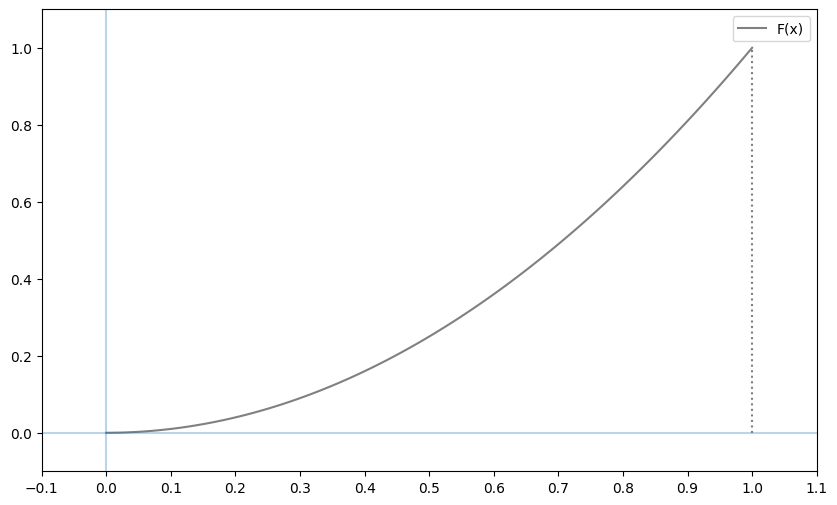

In [11]:
# x_range에서 정의된 범위 내에서 균등하게 100개의 점을 생성합니다.
xs = np.linspace(x_range[0], x_range[1], 100)

# 그래프의 크기를 설정하고, 하나의 그래프를 생성합니다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# xs에서 정의된 각 x에 대해 F(x)를 계산하고, 이를 그래프에 플로팅합니다.
# 이는 누적 분포 함수의 형태를 보여줍니다.
ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')

# x축과 y축에 대해 투명도를 낮춘 선을 추가하여 그리드 형태를 만듭니다.
ax.hlines(0, -0.1, 1.1, alpha=0.3)  # y=0에 수평선을 추가합니다.
ax.vlines(0, -0.1, 1.1, alpha=0.3)  # x=0에 수직선을 추가합니다.

# xs의 최댓값에서 세로 점선을 그려 x축의 범위를 나타냅니다.
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

# x축의 눈금을 설정합니다.
ax.set_xticks(np.arange(-0.1, 1.2, 0.1))

# x축과 y축의 범위를 설정합니다.
ax.set_xlim(-0.1, 1.1)  # x축의 범위를 설정합니다.
ax.set_ylim(-0.1, 1.1)  # y축의 범위를 설정합니다.

# 범례를 추가하여 F(x) 곡선을 설명합니다.
ax.legend()

# 플롯을 보여줍니다.
plt.show()

In [12]:
# y의 범위를 정의합니다. 이 범위는 확률 밀도 함수 g(y)가 0이 아닌 값을 가지는 구간입니다.
y_range = [3, 5]

# 확률 밀도 함수 g(y)를 정의합니다.
# 이 함수는 y가 y_range 내에 있을 때만 특정 값을 가지고, 그 외에는 0을 반환합니다.
def g(y):
    # y가 주어진 범위 내에 있는지 확인합니다.
    if y_range[0] <= y <= y_range[1]:
        # 범위 내에 있다면, y에 대한 확률 밀도 값을 계산합니다.
        # 이 경우, y - 3을 2로 나눈 값을 반환합니다. 
        # 이것은 확률 밀도 함수를 선형으로 모델링 한 것입니다.
        return (y - 3) / 2
    else:
        # y가 주어진 범위 밖에 있으면, 확률 밀도 값이 0입니다.
        return 0

# 누적 분포 함수 G(y)를 정의합니다.
# 이 함수는 주어진 y 값에 대해, -∞부터 y까지의 확률 밀도 함수 g(y)를 적분한 값을 반환합니다.
def G(y):
    # scipy의 integrate.quad 함수를 사용하여 g(y)를 -∞부터 y까지 적분합니다.
    # 첫 번째 반환 값은 적분의 결과, 즉 누적 확률입니다.
    # 두 번째 반환 값은 오차 추정치입니다. 여기서는 첫 번째 값만 사용합니다.
    return integrate.quad(g, -np.inf, y)[0]

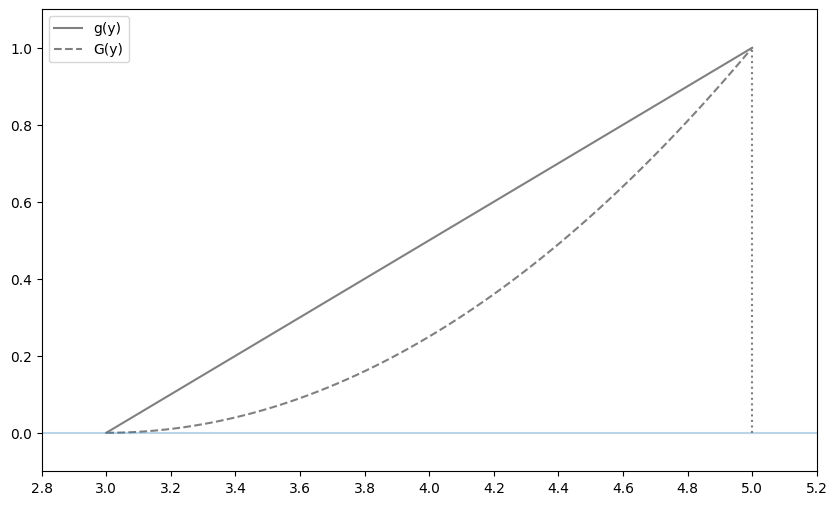

In [13]:
# y값들을 생성하기 위한 범위를 지정합니다. 이 경우 y_range[0]에서 y_range[1] 사이의 100개의 동일한 간격을 가진 값들을 생성합니다.
ys = np.linspace(y_range[0], y_range[1], 100)

# 그래프의 크기를 설정하고, 서브플롯을 추가합니다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 확률 밀도 함수 g(y)를 그래프에 플롯합니다. 여기서는 ys 범위 내의 각 y값에 대해 g(y)를 계산하여 연결된 선으로 표시합니다.
ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')

# 누적 분포 함수 G(y)도 그래프에 플롯합니다. 마찬가지로 ys 범위 내의 각 y값에 대해 G(y)를 계산하고, 이를 점선으로 표시하여 g(y)와 구분합니다.
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')

# x축과 y축에 대한 가로줄과 세로줄을 추가하여 축의 구조를 강조합니다.
ax.hlines(0, 2.8, 5.2, alpha=0.3) # y=0에 대한 수평선
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray') # x축의 최대값에 대한 수직 점선

# x축과 y축의 눈금을 설정합니다.
ax.set_xticks(np.arange(2.8, 5.2, 0.2))

# 그래프의 x축과 y축의 범위를 설정합니다.
ax.set_xlim(2.8, 5.2) # x축 범위
ax.set_ylim(-0.1, 1.1) # y축 범위

# 범례를 추가하여 어떤 선이 g(y)이고 어떤 선이 G(y)인지 표시합니다.
ax.legend()

# 그래프를 표시합니다.
plt.show()

In [14]:
# 이 함수는 확률밀도함수 f(x)와 변수 x의 곱을 반환합니다.
# 즉, 이 함수는 확률변수의 기대값을 계산하기 위한 피적분함수입니다.
def integrand(x):
    return x * f(x)
    
# scipy의 integrate.quad 함수를 사용하여 피적분함수 integrand를
# -np.inf 부터 np.inf (무한대부터 무한대)까지 적분합니다.
# 이는 연속 확률분포의 기대값을 계산하는 과정입니다.
# 결과는 적분값과 추정 오차의 튜플로 반환되는데, 여기서는 적분값만 필요합니다.
# [0]을 통해 적분 결과의 첫 번째 요소(적분값)만을 추출합니다.
integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [15]:
# E 함수는 확률변수 X에 대한 기대값을 계산합니다. 
# g는 확률변수에 적용할 함수로, 기본적으로 항등함수 lambda x: x가 사용됩니다.
# 즉, g를 지정하지 않으면 기대값 E[X]를 계산합니다.
def E(X, g=lambda x: x):
    # 확률변수 X는 값의 범위(x_range)와 확률밀도함수(f)를 튜플로 가지고 있습니다.
    x_range, f = X
    
    # integrand 함수는 확률밀도함수와 g 함수의 곱을 반환합니다.
    # 이 함수는 적분될 함수로, 기대값 계산에 사용됩니다.
    def integrand(x):
        return g(x) * f(x)
    
    # scipy의 integrate.quad 함수를 사용하여 integrand 함수를 적분합니다.
    # 적분의 범위는 -np.inf부터 np.inf까지입니다. 
    # 이는 전체 실수 범위에 대한 적분을 의미합니다.
    # integrate.quad 함수는 적분값과 추정 오차를 튜플로 반환합니다.
    # 여기서는 [0]을 통해 적분값(기대값)만을 추출합니다.
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [16]:
# 이 함수 호출은 확률변수 X의 선형 변환 2X + 3에 대한 기대값 E[2X + 3]을 계산합니다.
# lambda 함수를 통해 각 확률변수 값 x에 대해 2x + 3 연산을 적용합니다.
E(X, g=lambda x: 2*x + 3)

4.333

In [17]:
2 * E(X) + 3

4.333

In [18]:
# 확률변수 X의 기대값(평균)을 계산합니다.
mean = E(X)

# 적분될 함수를 정의합니다. 이 함수는 (x - 평균)^2를 확률밀도함수 f(x)와 곱한 값을 반환합니다.
# 이는 분산 계산 공식의 일부로, 각 값이 평균에서 얼마나 떨어져 있는지(제곱한 값)의 기대값을 구하는 것입니다.
def integrand(x):
    return (x - mean) ** 2 * f(x)

# scipy의 적분 함수 quad를 사용하여 -무한대부터 +무한대까지 integrand 함수를 적분합니다.
# 이는 분산의 정의에 따른 것으로, 모든 가능한 x 값에 대해 (x - 평균)^2 * f(x)를 적분하여 평균 제곱 편차를 구합니다.
# quad 함수는 적분값과 추정 오차를 튜플 형태로 반환하는데, 여기서는 적분값만 필요하기 때문에 [0]을 통해 적분값만을 추출합니다.
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [19]:
# V 함수는 확률변수 X와 변환 함수 g를 인자로 받습니다.
# 기본적으로 g는 항등 함수입니다(lambda x: x).
def V(X, g=lambda x: x):
    # X는 범위(x_range)와 확률밀도함수(f)를 튜플로 가지고 있습니다.
    x_range, f = X
    
    # 변환된 확률변수 g(X)의 평균(기대값)을 계산합니다.
    mean = E(X, g)
    
    # 적분될 함수(integrand)를 정의합니다. 
    # 이 함수는 (g(x) - 평균)^2를 확률밀도함수 f(x)와 곱한 값을 반환합니다.
    # 이는 변환된 확률변수의 각 값이 그 평균에서 얼마나 떨어져 있는지(제곱한 값)의 기대값을 구하는 것입니다.
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    
    # scipy의 적분 함수 quad를 사용하여 -무한대부터 +무한대까지 integrand 함수를 적분합니다.
    # 이는 변환된 확률변수의 분산의 정의에 따른 것으로, 모든 가능한 x 값에 대해 
    # (g(x) - 평균)^2 * f(x)를 적분하여 평균 제곱 편차를 구합니다.
    # quad 함수는 적분값과 추정 오차를 튜플 형태로 반환합니다. 
    # 여기서는 적분값만 필요하기 때문에 [0]을 통해 적분값만을 추출합니다.
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [20]:
# V(X) 호출:
# 이 호출은 확률변수 X의 분산을 계산하는 과정을 시작합니다.
# 여기서 X는 확률변수의 값의 범위와 해당 확률변수의 확률밀도함수를 포함하는 튜플입니다.
# 예를 들어, X는 (x_range, f)의 형태를 가질 것이며,
# x_range는 확률변수 X가 가질 수 있는 모든 값의 범위를 나타내고,
# f는 해당 값의 범위에 대한 확률밀도함수를 의미합니다.

# 확률변수 X의 분산을 계산하기 위해 V 함수를 호출합니다.
# 이 함수는 X의 범위와 밀도함수, 그리고 변환함수 g를 사용합니다.
# g는 기본적으로 항등 함수로 설정되어 있습니다(lambda x: x).
# 따라서 g(x) = x 이므로 V(X)는 X의 분산을 계산하게 됩니다.

# V 함수 내에서, X의 기대값(평균)을 E 함수를 통해 계산합니다.
# 그런 다음 (x - mean) ** 2 * f(x) 형태의 integrand 함수를 정의합니다.
# 이 함수는 분산을 계산하기 위해 각 x 값에서의 (값 - 평균)^2를 확률밀도함수에 가중하여 합산합니다.

# 최종적으로 scipy의 integrate.quad 함수를 사용하여
# integrand 함수를 모든 x 값에 대해 적분합니다(-무한대부터 무한대까지).
# 이 적분의 결과는 확률변수 X의 분산을 나타내며, 
# 이 값은 변환 없이 확률변수 자체의 분산을 나타냅니다.

# quad 함수는 적분 결과와 추정 오차를 튜플로 반환합니다.
# [0]을 사용하여 첫 번째 요소(적분 결과)만 추출하며,
# 이는 확률변수 X의 분산에 해당합니다.
V(X)

0.056

In [21]:
# V(X, lambda x: 2*x + 3) 호출:
# 이 호출은 변환된 확률변수 Y의 분산을 계산합니다.
# 여기서 Y는 원래 확률변수 X를 변환한 것으로 Y = g(X) = 2X + 3 입니다.

# 변환 함수 g를 정의하여 X에 적용합니다. 이 경우, 각각의 X 값에 대해
# Y = 2X + 3 변환이 적용됩니다.

# V 함수 내에서, 변환된 확률변수 Y의 기대값을 E(X, g)를 통해 계산합니다.
# 여기서 g(x) = 2x + 3 입니다. 이는 X의 각 값에 대해 변환을 적용하고
# 이를 평균화하여 Y의 평균을 얻는 과정입니다.

# 그런 다음 integrand(x) 함수를 정의하여 (g(x) - mean) ** 2 * f(x)를 계산합니다.
# 이 함수는 변환된 확률변수 Y의 각 값에 대한 (값 - 평균)^2를 계산하고
# 이를 확률밀도함수 f(x)로 가중하여 분산을 구합니다.

# scipy의 integrate.quad 함수를 사용하여 integrand 함수를 적분합니다.
# 이 적분은 -무한대부터 무한대까지 수행되며, 변환된 확률변수 Y의 분산을 구하는데 사용됩니다.

# quad 함수는 적분 결과와 추정 오차를 튜플로 반환합니다.
# [0]을 사용하여 첫 번째 요소(적분 결과)만을 추출하는데,
# 이는 변환된 확률변수 Y의 분산입니다.

V(X, lambda x: 2*x +3)

0.222

In [22]:
2**2 * V(X)

0.222

In [23]:
# x_range와 y_range는 확률변수 X와 Y의 값을 제한하는 범위를 정의합니다.

x_range = [0, 2]  # 이는 확률변수 X의 값이 0 이상 2 이하임을 나타냅니다.
y_range = [0, 1]  # 이는 확률변수 Y의 값이 0 이상 1 이하임을 나타냅니다.

# 예를 들어, 만약 이 변수들이 연속균등분포를 따른다면,
# X는 [0, 2] 구간에서 균일한 확률로 값을 가지며,
# Y는 [0, 1] 구간에서 균일한 확률로 값을 가집니다.

In [24]:
def f_xy(x, y):
    # 이 함수는 두 확률변수 X와 Y의 결합 확률밀도함수를 정의합니다.
    
    # 먼저, 확률변수 Y의 값이 0과 1 사이에 있고,
    # 확률변수 X - Y의 값이 0과 1 사이에 있는지 확인합니다.
    # 이는 X와 Y의 지지 집합(support)을 정의합니다.
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        
        # 만약 (x, y) 쌍이 지지 집합 내에 있으면, 결합 확률밀도함수의 값을 계산합니다.
        # 이 함수는 x와 y의 선형 조합으로 이루어진 간단한 형태입니다.
        # 여기서는 4를 곱하는 상수가 있어, 이는 확률밀도함수가 특정 조건을 만족하도록
        # 정규화하는 데 사용될 수 있습니다 (예: 전체 확률이 1이 되도록).
        return 4 * y * (x - y)
        
    else:
        
        # 만약 (x, y) 쌍이 지지 집합 외부에 있으면, 확률밀도함수의 값은 0입니다.
        # 즉, 이 범위 밖에서는 두 확률변수가 동시에 값을 가질 수 없음을 의미합니다.
        return 0

In [25]:
# XY는 확률변수 X와 Y에 대한 정보를 담고 있는 리스트입니다.
# x_range와 y_range는 각각 확률변수 X와 Y의 값이 취할 수 있는 범위를 나타냅니다.
# f_xy는 확률변수 X와 Y의 결합 확률밀도함수를 나타내는 함수입니다.
XY = [x_range, y_range, f_xy]

# 예를 들어, x_range는 확률변수 X가 취할 수 있는 값의 범위를 나타내며,
# 이 경우에는 [0, 2]로 정의된 것을 알 수 있습니다.
# 마찬가지로 y_range는 확률변수 Y의 범위를 나타내고 [0, 1]로 정의되어 있습니다.

# f_xy는 결합 확률밀도함수를 나타내는 실제 함수입니다.
# 이 함수는 X와 Y의 각 값에 대해 그들이 동시에 특정 값을 가질 확률밀도를 계산합니다.

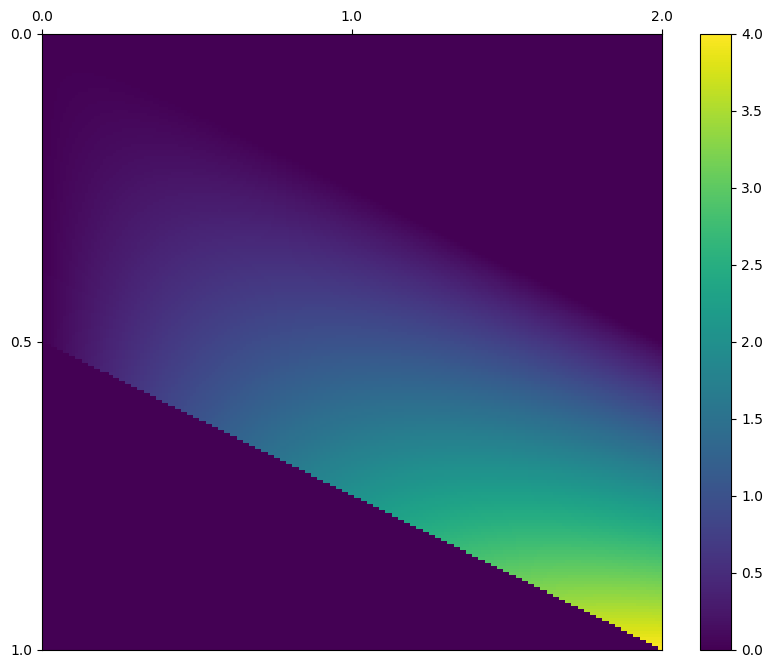

In [26]:
# 확률변수 X의 가능한 값의 범위를 생성합니다. 여기서는 0부터 2까지 200개의 점을 균일하게 생성합니다.
xs = np.linspace(x_range[0], x_range[1], 200)
# 확률변수 Y의 가능한 값의 범위를 생성합니다. 여기서는 0부터 1까지 200개의 점을 균일하게 생성합니다.
ys = np.linspace(y_range[0], y_range[1], 200)
# 결합 확률밀도함수를 이용하여 확률밀도를 계산합니다. 이를 2차원 배열로 구성합니다.
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

# 그래픽 객체를 생성하고 크기를 설정합니다.
fig = plt.figure(figsize=(10, 8))
# 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# 확률밀도를 색상으로 나타내는 히트맵을 생성합니다.
c = ax.pcolor(pd)
# X축의 눈금을 설정합니다. 여기서는 200개의 데이터 포인트를 3개의 섹션으로 나눕니다.
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
# Y축의 눈금을 설정합니다. 같은 방법으로 3개의 섹션으로 나눕니다.
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
# X축의 레이블을 실제 값의 범위로 설정합니다. 0부터 2까지 3개의 값을 표시합니다.
ax.set_xticklabels(np.linspace(0, 2, 3))
# Y축의 레이블도 실제 값의 범위로 설정합니다. 0부터 1까지 3개의 값을 표시합니다.
ax.set_yticklabels(np.linspace(0, 1, 3))
# Y축을 상하반전시킵니다. 보통 히트맵은 위쪽이 0이 되도록 그립니다.
ax.invert_yaxis()
# X축의 눈금을 상단에 위치시킵니다.
ax.xaxis.tick_top()
# 히트맵의 색상바를 추가합니다. 이는 확률밀도 값의 척도를 나타냅니다.
fig.colorbar(c, ax=ax)
# 생성한 플롯을 표시합니다.
plt.show()

In [27]:
# integrate.nquad 함수는 다중적분을 계산합니다.
# 여기서 f_xy는 두 변수 x, y에 대한 피적분함수입니다.

# 적분 구간이 [-np.inf, np.inf]로 설정되어 있는데, 
# 이는 x와 y 모두에 대해 음의 무한대부터 양의 무한대까지 적분하라는 의미입니다.
# 이러한 적분은 f_xy가 전체 실수 집합에 대해 정의된 경우에만 의미가 있습니다.
# 대부분의 실제 상황에서 확률 밀도 함수는 무한한 범위가 아닌 특정 범위 내에서만 정의됩니다.

# 결과적으로, 이 코드는 주어진 범위에 대해 f_xy를 적분하여 그 결과를 반환합니다.
# 결과는 적분된 값의 첫 번째 요소로, 적분의 오차 추정치는 무시됩니다.
result = integrate.nquad(f_xy,
                         [[-np.inf, np.inf],
                          [-np.inf, np.inf]])[0]

1.000

In [28]:
from functools import partial

# x에 대한 주변 확률 밀도 함수 f_X(x)를 계산하는 함수입니다.
def f_X(x):
    
    # partial 함수는 f_xy의 첫 번째 인수를 x로 고정합니다.
    # 그런 다음, y의 가능한 모든 값에 대해 f_xy를 적분하여 f_X(x)를 얻습니다.
    # 적분 구간은 y에 대한 실제 확률 밀도 함수의 지지(support)에 맞추어야 합니다.
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]

# y에 대한 주변 확률 밀도 함수 f_Y(y)를 계산하는 함수입니다.
def f_Y(y):
    
    # partial 함수는 f_xy의 두 번째 인수인 y를 고정합니다.
    # 그런 다음, x의 가능한 모든 값에 대해 f_xy를 적분하여 f_Y(y)를 얻습니다.
    # 적분 구간은 x에 대한 실제 확률 밀도 함수의 지지에 맞추어야 합니다.
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]


In [29]:
# 확률 변수 X에 대한 주변 확률 분포를 나타내는 리스트를 생성합니다.
# x_range는 확률 변수 X가 취할 수 있는 값의 범위를 나타내며,
# f_X는 X의 주변 확률 밀도 함수입니다.
X = [x_range, f_X]

# 확률 변수 Y에 대한 주변 확률 분포를 나타내는 리스트를 생성합니다.
# y_range는 확률 변수 Y가 취할 수 있는 값의 범위를 나타내며,
# f_Y는 Y의 주변 확률 밀도 함수입니다.
Y = [y_range, f_Y]

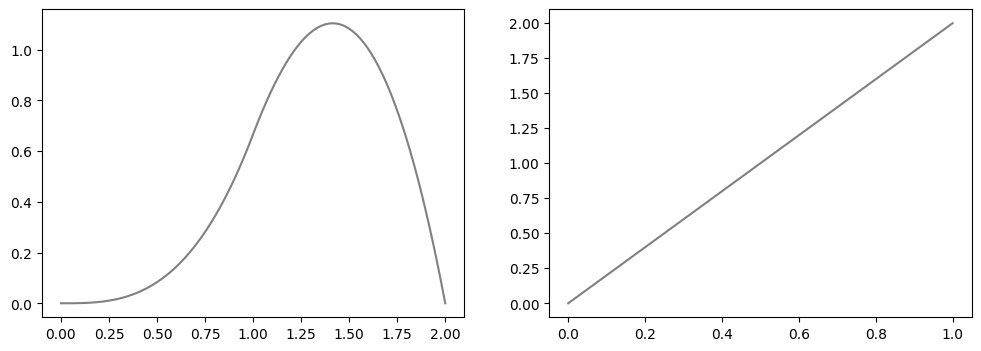

In [30]:
# x_range 내의 균일한 100개의 값들로 구성된 배열을 생성합니다.
xs = np.linspace(*x_range, 100)

# y_range 내의 균일한 100개의 값들로 구성된 배열을 생성합니다.
ys = np.linspace(*y_range, 100)

# 그림의 크기를 설정하고 두 개의 서브플롯을 생성합니다.
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)  # 첫 번째 서브플롯
ax2 = fig.add_subplot(122)  # 두 번째 서브플롯

# 첫 번째 서브플롯에 X의 주변 밀도 함수를 그레이 색으로 그립니다.
ax1.plot(xs, [f_X(x) for x in xs], color='gray')

# 두 번째 서브플롯에 Y의 주변 밀도 함수를 그레이 색으로 그립니다.
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')

# 각 서브플롯에 타이틀을 설정합니다. 여기서는 오류가 있습니다.
# 올바른 변수 이름을 사용해야 합니다(ax1, ax2).
ax1.set_title('X marginal density function')  # ax1의 타이틀 설정
ax2.set_title('Y marginal density function')  # ax2의 타이틀 설정

# 모든 서브플롯을 표시합니다.
plt.show()

In [31]:
# 결합 확률 밀도 함수와 X 값을 곱한 피적분 함수를 정의합니다.
def integrand(x, y):
    return x * f_xy(x, y)

# nquad 함수를 사용하여 이중 적분을 수행합니다.
# 첫 번째 인자는 피적분 함수이고, 두 번째 인자는 적분 범위입니다.
# 적분 범위는 두 변수 X와 Y 모두에 대해 무한대에서 무한대까지 설정되어 있습니다.
# 이는 실제로는 `f_xy`의 지원이 무한하지 않을 경우 불필요한 계산을 수행하게 될 수 있습니다.
# `integrate.nquad`는 다변수 함수의 수치적분을 수행하는 함수입니다.
# 이 함수는 적분값과 추정된 오차를 포함하는 튜플을 반환합니다.
# 여기서 [0]은 첫 번째 요소, 즉 적분값을 가져옵니다.
expected_value = integrate.nquad(integrand,
                                 [[-np.inf, np.inf],
                                  [-np.inf, np.inf]])[0]

# 이 기대값은 X의 평균을 의미합니다.

1.333

In [32]:
# 확률 변수 XY의 기대값을 계산하는 함수
def E(XY, g):
    # XY 벡터에서 x의 범위, y의 범위, 그리고 f_xy 결합 확률 밀도 함수를 추출
    x_range, y_range, f_xy = XY
    
    # 기대값을 계산하기 위한 피적분 함수
    def integrand(x, y):
        # 함수 g와 결합 확률 밀도를 곱하여 반환
        return g(x, y) * f_xy(x, y)

    # 이중 적분을 통해 기대값을 계산
    # 이론적으로는 x와 y 범위가 XY의 지원에 근거하여 적절하게 설정되어야 함
    return integrate.nquad(integrand,
                            [[-np.inf, np.inf],
                             [-np.inf, np.inf]])[0]

In [33]:
# 결합 확률 분포 f_{XY}(x, y)를 가진 이중 확률 변수 XY에 대해
# X 확률 변수의 기대값 E(X)를 계산한다.
mean_X = E(XY, lambda x, y: x)  # x에 대한 함수 g(x, y) = x를 적용

# mean_X 변수는 이제 X의 기대값을 가지고 있다.
mean_X

1.333

In [34]:
# 결합 확률 분포 f_{XY}(x, y)를 가지는 확률 변수 XY에 대하여
# Y 확률 변수의 기대값 E(Y)를 계산한다.
mean_Y = E(XY, lambda x, y: y)  # y에 대한 함수 g(x, y) = y를 적용

# mean_Y 변수는 이제 Y의 기대값을 가지고 있다.
mean_Y

0.667

In [35]:
a, b = 2, 3

In [36]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [37]:
a * mean_X + b * mean_Y

4.667

In [38]:
# mean_X는 X의 기대값(평균)으로, 이미 계산된 것으로 가정
def integrand(x, y):
    # (x - mean_X)**2 * f_xy(x, y)은 확률변수 X의 값 x에서
    # 기대값 mean_X를 뺀 값의 제곱에 확률밀도함수 f_xy(x, y)를 곱한 것으로,
    # 확률변수 X의 분산을 구하기 위한 적분 함수입니다.
    return (x - mean_X)**2 * f_xy(x, y)

# integrate.nquad 함수는 여러 변수에 대한 적분을 수행합니다.
# 여기서는 x와 y의 모든 가능한 값에 대해 적분을 수행하여
# 확률변수 X의 분산을 계산합니다. 적분 범위는 -무한대부터 무한대까지입니다.
integrate.nquad(integrand,
                         [[-np.inf, np.inf],
                         [-np.inf, np.inf]])[0]

0.111

In [39]:
def V(XY, g):
    # XY는 결합확률밀도함수 f_xy와 확률변수 X, Y의 범위를 포함하는 리스트입니다.
    x_range, y_range, f_xy = XY
    
    # E(XY, g)는 기대값(평균)을 계산하는 함수로, 확률변수에 함수 g를 적용한 후의 기대값을 구합니다.
    mean = E(XY, g)
    
    # integrand 함수는 확률변수에 함수 g를 적용한 값에서 평균을 뺀 것의 제곱을 f_xy와 곱하여 반환합니다.
    # 이것은 분산을 계산하기 위한 적분함수입니다.
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    # integrate.nquad는 다변수 함수의 정적분을 수행하는 함수입니다.
    # 여기서는 x와 y에 대해 -무한대부터 무한대까지 적분을 수행합니다.
    # 반환값은 적분값의 첫 번째 요소이며, 이는 계산된 분산 값입니다.
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

# 이 함수를 사용하여 예를 들어 X의 분산을 구하려면 다음과 같이 호출할 수 있습니다:
# var_X = V(XY, lambda x, y: x)

In [40]:
# V 함수를 활용하여 확률변수 X의 분산을 계산합니다.
# lambda x, y: x는 X의 값을 반환하는 람다 함수이며, 이는 g 함수로 사용됩니다.
var_X = V(XY, lambda x, y: x)

# var_X 변수는 계산된 X의 분산을 저장합니다.
# 이 계산은 결합확률밀도함수 f_xy와 X의 범위 x_range, Y의 범위 y_range 정보를 포함하는 XY를 사용합니다.
var_X

0.111

In [41]:
# V 함수는 확률변수의 분산을 계산하는 함수입니다.
# lambda x, y: y는 Y의 값을 반환하는 람다 함수로, 확률변수 Y에 대한 함수 g로 사용됩니다.
var_Y = V(XY, lambda x, y: y)

# var_Y 변수는 계산된 Y의 분산을 저장합니다.
# 이 계산은 XY로부터 X와 Y의 범위 및 결합확률밀도함수 f_xy를 사용합니다.
var_Y

0.056

In [42]:
# Cov 함수는 두 확률변수 X와 Y의 공분산을 계산합니다.
def Cov(XY):
    # XY로부터 X와 Y의 범위와 결합 확률 밀도 함수 f_xy를 추출합니다.
    x_range, y_range, f_xy = XY
    
    # E 함수를 사용하여 X의 기대값을 계산합니다.
    mean_X = E(XY, lambda x, y: x)
    
    # E 함수를 사용하여 Y의 기대값을 계산합니다.
    mean_Y = E(XY, lambda x, y: y)
    
    # integrand 함수는 X와 Y의 공분산을 위한 피적분 함수입니다.
    # (x-mean_X) * (y-mean_Y)는 X와 Y의 편차의 곱을 나타냅니다.
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)
    
    # integrate.nquad 함수는 integrand를 [-np.inf, np.inf] 범위에서 적분하여
    # X와 Y의 공분산을 계산합니다.
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [43]:
# XY는 두 확률변수 X, Y의 결합 분포를 나타내는 변수로, 이전에 정의되었습니다.
# 여기에는 범위(range)와 결합 확률 밀도 함수가 포함되어 있습니다.

# Cov 함수를 호출하여 두 확률변수 X, Y의 공분산을 계산합니다.
cov_xy = Cov(XY)

# 계산된 공분산 값을 cov_xy 변수에 저장합니다.
# 이 값을 통해 두 변수 X, Y의 선형 관계의 강도와 방향을 알 수 있습니다.
cov_xy

0.056

In [44]:
# V 함수는 두 확률변수의 결합 분포를 나타내는 XY와,
# 그 변수에 적용할 함수를 인자로 받아 해당 함수의 분산을 계산합니다.

# 여기서는 두 확률변수 X와 Y에 대해 선형 조합 aX + bY의 분산을 계산합니다.
# 람다 함수는 각각의 (x, y) 값에 대해 a*x + b*y를 계산합니다.

# 분산을 계산하기 위해 V 함수에는 람다 함수와 결합 분포 정보 XY를 전달합니다.
# V 함수 내부에서는 람다 함수에 정의된 선형 조합에 대한 기대값을 구하고,
# 이를 기준으로 해당 확률변수의 값들이 얼마나 퍼져 있는지를 계산합니다.

# 이 계산된 분산값은 선형 조합 aX + bY의 퍼짐 정도를 나타내며,
# 통계적 추론이나 데이터 분석에서 중요한 역할을 합니다.
# 결과는 함수 호출이 완료되면 반환됩니다.

V(XY, lambda x, y: a*x + b*y)

1.611

In [45]:
# 두 확률변수 X와 Y의 선형 조합의 분산을 계산합니다.
# a와 b는 확률변수 X와 Y에 곱해지는 상수입니다.

# 분산의 선형 결합 공식에 따르면, 두 확률변수의 선형 조합의 분산은
# 각 확률변수의 분산에 대한 계수의 제곱에 해당하는 분산의 합과,
# 두 계수의 곱에 2를 곱한 값에 X와 Y의 공분산을 곱한 합으로 표현됩니다.

# 구체적으로,
# a^2 * var_X 는 확률변수 X에 대한 분산에 a^2을 곱한 값입니다.
# b^2 * var_Y 는 확률변수 Y에 대한 분산에 b^2을 곱한 값입니다.
# 2*a*b * cov_xy 는 X와 Y의 공분산에 2ab를 곱한 값입니다.

# 이 모든 값들을 더하면 aX + bY의 전체 분산을 구할 수 있습니다.
# 이러한 계산은 데이터의 변동성을 측정하고 위험을 관리하는 데 중요한 역할을 합니다.
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

In [46]:
# 두 확률변수 X와 Y 사이의 상관계수를 계산합니다.

# 상관계수는 두 변수 간의 선형 관계의 강도를 측정하는 통계량입니다.
# -1에서 1사이의 값을 가지며, 1은 완벽한 양의 선형 관계를, 
# -1은 완벽한 부의 선형 관계를, 0은 선형 관계의 부재를 나타냅니다.

# cov_xy는 X와 Y의 공분산으로, 두 변수가 함께 변하는 경향을 측정합니다.
# var_X와 var_Y는 각각 X와 Y의 분산으로, 각 변수의 변동성을 나타냅니다.

# 공분산을 두 변수의 표준편차의 곱으로 나눔으로써
# 단위에 의존하지 않는 표준화된 상관 관계의 척도를 얻을 수 있습니다.
# 이는 다양한 분야에서 두 데이터의 관계를 이해하는 데 사용됩니다.

cov_xy / np.sqrt(var_X * var_Y)

0.707